In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import numpy as np

# Read files:
train = pd.read_csv("train.csv", low_memory=False)
test = pd.read_csv("test.csv", low_memory=False)

In [38]:
train[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
# check discrepancy btw two sets
train.columns.equals(test.columns)

False

In [40]:
# check different column
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [41]:
# combine two sets
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

In [42]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [43]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source'],
      dtype='object')

In [44]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [45]:
# check missing value
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [46]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(data.isnull().sum()/len(data.index)), 2)

Item_Fat_Content              0.00
Item_Identifier               0.00
Item_MRP                      0.00
Item_Outlet_Sales            40.00
Item_Type                     0.00
Item_Visibility               0.00
Item_Weight                  17.17
Outlet_Establishment_Year     0.00
Outlet_Identifier             0.00
Outlet_Location_Type          0.00
Outlet_Size                  28.27
Outlet_Type                   0.00
source                        0.00
dtype: float64

In [47]:
# unique records in loan dataset
data.nunique()

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

In [48]:
# check factor variable levels
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [49]:
# Filter categorical variables
categorical_columns = [x for x in data.columns if data.dtypes[x] == 'object']

# Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

# Frequency table 
print("Frequency Table")
for col in categorical_columns:
    print('\nFrequency table for varible %s' % col)
    print(data[col].value_counts(sort=True, dropna=False))

Frequency Table

Frequency table for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency table for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency table for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency table for varible Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Fr

In [50]:
# low fat, Lf = Low Fat
# reg = Ragular 
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                  'low fat': 'Low Fat', 
                                  'reg':'Regular'}, inplace=True)
data["Item_Fat_Content"].value_counts(sort=True, dropna=False)

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [51]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

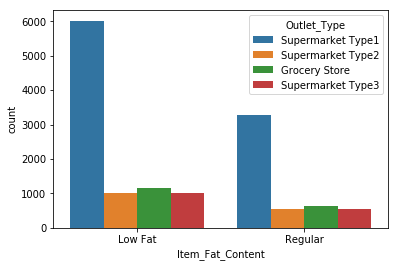

In [52]:
sns.countplot(x="Item_Fat_Content", hue="Outlet_Type", data=data);

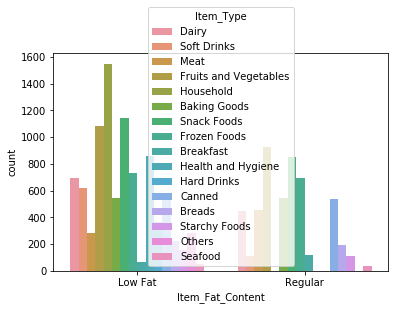

In [53]:
sns.countplot(x="Item_Fat_Content",  hue="Item_Type", data=data);

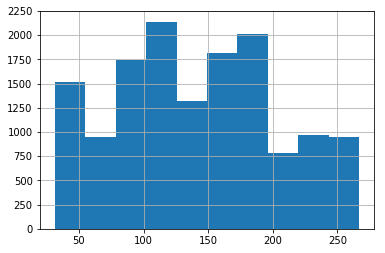

In [54]:
data['Item_MRP'].hist()

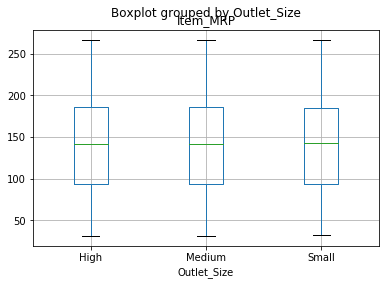

In [55]:
data.boxplot(column='Item_MRP', by='Outlet_Size')

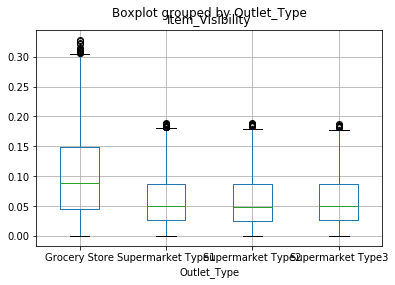

In [56]:
data.boxplot(column='Item_Visibility', by='Outlet_Type')

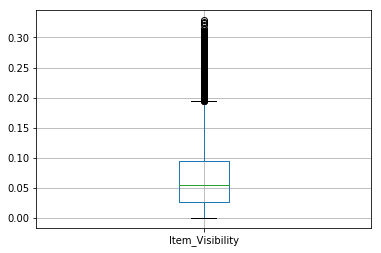

In [57]:
data.boxplot(column='Item_Visibility')

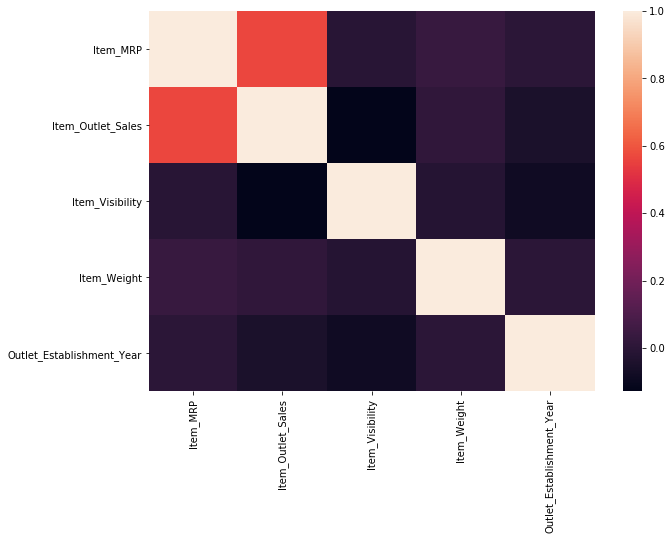

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr())

3. Data Cleaning

Imputing Missing Values
'Item_Weight'

In [60]:
# table avg. weight per item
# data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight = data.groupby("Item_Identifier").Item_Weight.mean()

# get null index
miss_idx = data['Item_Weight'].isnull() 

print('Orignal #missing: %d' % sum(miss_idx))

# input missing data
data.loc[miss_idx, 'Item_Weight'] = data.loc[miss_idx, 'Item_Identifier'].apply(lambda x: item_avg_weight[x])
print('Final # missing: %d' % sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final # missing: 0


In [61]:
# determine average visibility of a product
# data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg = data.groupby('Item_Identifier').Item_Visibility.mean()

# impute 0 values with mean visibility of that product
miss_idx = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d' % sum(miss_idx))
data.loc[miss_idx, 'Item_Visibility'] = data.loc[miss_idx, 'Item_Identifier'].apply(lambda x: visibility_avg[x])
print('Number of 0 values after modification: %d' % sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


'Outlet_Size'

In [59]:
from scipy.stats import mode

# determine the mode for each
outlet_size_mode = data.dropna(subset=['Outlet_Size']).pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

# get null index
miss_idx = data['Outlet_Size'].isnull() 

# input missing data
print('\nOrignal #missing: %d' % sum(miss_idx))
data.loc[miss_idx, 'Outlet_Size'] = data.loc[miss_idx, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print('Final # missing: %d' % sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
Final # missing: 0


4. Feature Engineering

Step 1: Consider combining Outlet_Type

In [26]:
#Fat_Content showing redudancy of differnt types
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [62]:
# Years, since the data is collected in 2013, we use 2013 as a starting year
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [63]:
# Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
print (data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [64]:
np.array(data.select_dtypes(include=["object_"]).columns)

array(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'source'], dtype=object)

In [65]:
#Convert categorical into numerical 
var_mod=['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type']
number=LabelEncoder()

In [66]:
#Item_Identifier and outlet_Identifier are also useful for making prediction
data['Outlet']=number.fit_transform(data['Outlet_Identifier'])
data['Identifier']=number.fit_transform(data['Item_Identifier'])

In [67]:
for i in var_mod:
      data[i]=number.fit_transform(data[i])

In [68]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Visibility_MeanRatio,Outlet,Identifier
0,0,156,249.8092,3735.1380,4,0.016047,9.30,1999,9,0,1,1,train,14,0.931078,9,156
1,1,8,48.2692,443.4228,14,0.019278,5.92,2009,3,2,1,2,train,4,0.933420,3,8
2,0,662,141.6180,2097.2700,10,0.016760,17.50,1999,9,0,1,1,train,14,0.960069,9,662
3,1,1121,182.0950,732.3800,6,0.017834,19.20,1998,0,2,2,0,train,15,1.000000,0,1121
4,0,1297,53.8614,994.7052,9,0.009780,8.93,1987,1,2,0,1,train,26,1.000000,1,1297


In [69]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Years','Item_Visibility_MeanRatio',
            'Outlet','Identifier','Item_Weight']

In [70]:
seed = 342
np.random.seed(seed)

In [71]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=None)

In [72]:
from scipy.stats import randint, uniform

In [73]:
params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'gamma': [0, 0.5, 1],
    'n_estimators': [50,100,150,200],
    'learning_rate': [0.5, 0.75, 1], 
}

In [75]:
from xgboost.sklearn import XGBRegressor 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [76]:

data.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [77]:
X=data[predictors]

In [78]:
y=data['Item_Outlet_Sales']

In [79]:
from sklearn.model_selection import StratifiedKFold

In [80]:
xgf=XGBRegressor()

In [81]:
gxgf=GridSearchCV(xgf, params)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=43)

In [84]:
X_train=np.array(X_train)

In [85]:
y_train=np.array(y_train)

In [86]:
X_train = X_train.astype(float)

In [87]:
y_train = y_train.astype(float)

In [88]:
gxgf

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'gamma': [0, 0.5, 1], 'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.5, 0.75, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
gxgf.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [51]:
# data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')
data.groupby('Outlet_Type').Item_Outlet_Sales.mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

Step 2: Modify Item_Visibility

Step 3: Create a broad category of type of item

In [56]:
# get the first two characters of ID
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# rename them to more intuitive categories
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Step 4: Combine categories based on sales

In [57]:
# get idx of train part
train_idx = (data['source'] == 'train')

# subset the data
sub_data = data.loc[train_idx, ['Item_Identifier', 'Item_Outlet_Sales']]

# get avg. item sales by item_Identifier
item_avg_sales = sub_data.groupby("Item_Identifier").Item_Outlet_Sales.mean()

# extract the avg. sale percentile to group them into four categories
percentile = np.percentile(item_avg_sales, np.arange(0, 100, 25))
twentyfive = percentile[1]
fifty = percentile[2]
seventyfive = percentile[3]

# extract the Item_Identifier idx that fall between those percentiles
first_idx = item_avg_sales.apply(lambda x: x < twentyfive)
second_idx = item_avg_sales.apply(lambda x: x >= twentyfive and x < fifty)
third_idx = item_avg_sales.apply(lambda x: x >= fifty and x < seventyfive)
fourth_idx = item_avg_sales.apply(lambda x: x > seventyfive)

# extract the Item_Identifier names for each percentiles
first = item_avg_sales.loc[first_idx, ].index.values
second = item_avg_sales.loc[second_idx, ].index.values
thrid = item_avg_sales.loc[third_idx, ].index.values
fourth = item_avg_sales.loc[fourth_idx, ].index.values

# function to categorize each row
def id_to_percentile(x):
    if x in first:
        return('first')
    elif x in second:
        return('second')
    elif x in thrid:
        return('thrid')
    elif x in fourth:
        return('fourth')

data['Percentile'] = data['Item_Identifier'].apply(lambda x: id_to_percentile(x))

In [58]:
data['Percentile'].value_counts()

first     3580
second    3567
thrid     3556
fourth    3501
Name: Percentile, dtype: int64

Step 5: Determine the years of operation of a store

Step 6: Modify categories of Item_Fat_Content

In [60]:
# get idx for Non-consumable row
NC_idx = (data['Item_Type_Combined'] == "Non-Consumable")

# create new categories
data.loc[NC_idx, 'Item_Fat_Content'] = "Non-Edible"

data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Step 7: One-Hot Enoding for Categorical variables

In [63]:

data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Percentile,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,0.931078,1,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0.933420,0,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,0.960069,1,2,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1.000000,1,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,1.000000,2,0,26,1


In [64]:
# one-hot-encoding
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
                              'Item_Type_Combined', 'Outlet', 'Percentile'])

In [65]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

Step 8: Exporting Data

In [67]:
# drop the columns which have been converted to different types
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

# divide into test and train
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# drop unnecessary columns
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

# export files as modified versions
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

Model Building
Define a generic Function

In [70]:
from sklearn import model_selection, metrics

# Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    # Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], 
                                                dtrain[target], 
                                                cv=20, 
                                                scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, 
                                                             dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score), 
                                                                             np.std(cv_score),
                                                                             np.min(cv_score),
                                                                             np.max(cv_score)))
    
    # Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    # Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

1. Base Model

In [71]:
# Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

# Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1.loc['Item_Outlet_Sales'] = mean_sales

# Export submission file
# base1.to_csv("alg0.csv",index=False)

2. Linear Regression

In [72]:
IDcol

['Item_Identifier', 'Outlet_Identifier']


Model Report
RMSE : 1076
CV Score : Mean - 1078 | Std - 41.35 | Min - 1021 | Max - 1167


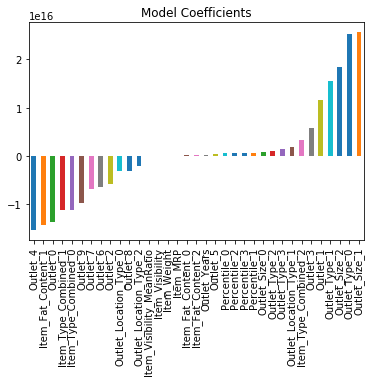

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')

coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

3. Ridge Regression


Model Report
RMSE : 1076
CV Score : Mean - 1078 | Std - 41.79 | Min - 1022 | Max - 1168


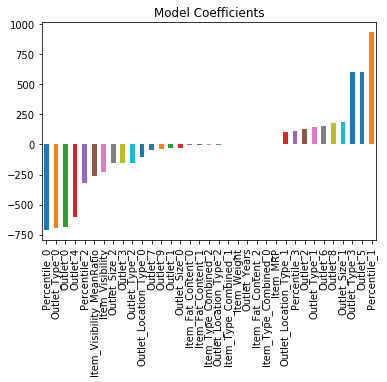

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg2 = Ridge(alpha=0.05, 
             normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')

coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

3. Decision Tree


Model Report
RMSE : 1001
CV Score : Mean - 1030 | Std - 40.27 | Min - 963.4 | Max - 1113


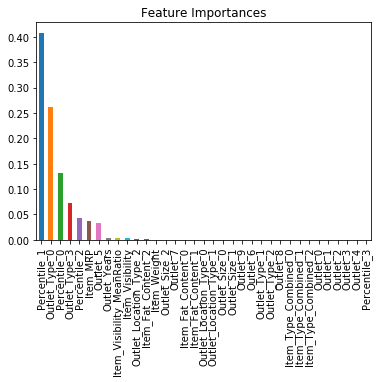

In [77]:
from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg3 = DecisionTreeRegressor(max_depth=15, 
                             min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')

coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


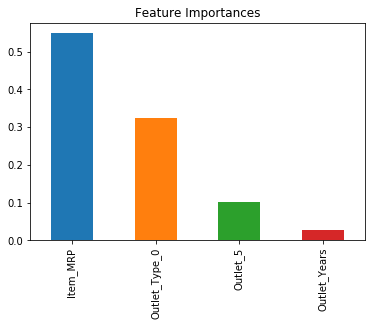

In [78]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']

alg4 = DecisionTreeRegressor(max_depth=8, 
                             min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')

coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [ ]:
4. Random Forest


Model Report
RMSE : 1027
CV Score : Mean - 1033 | Std - 39.28 | Min - 960.2 | Max - 1121


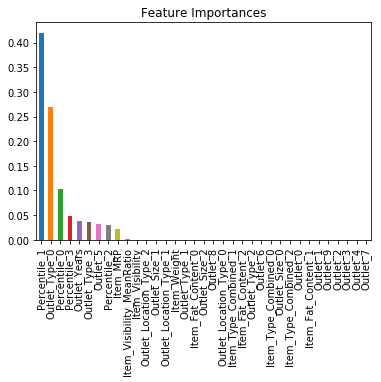

In [79]:
from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg5 = RandomForestRegressor(n_estimators=200, 
                             max_depth=5, 
                             min_samples_leaf=100, 
                             n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')

coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1017
CV Score : Mean - 1028 | Std - 38.41 | Min - 951.2 | Max - 1110


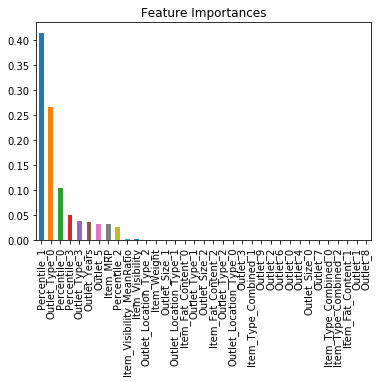

In [81]:
predictors = [x for x in train.columns if x not in [target] + IDcol]

alg6 = RandomForestRegressor(n_estimators=400,
                             max_depth=6, 
                             min_samples_leaf=100,
                             n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')

coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

SVM Model

In [85]:
from sklearn.svm import SVR


Model Report
RMSE : 1160
CV Score : Mean - 1163 | Std - 52.03 | Min - 1092 | Max - 1263


NameError: name 'save_fig' is not defined

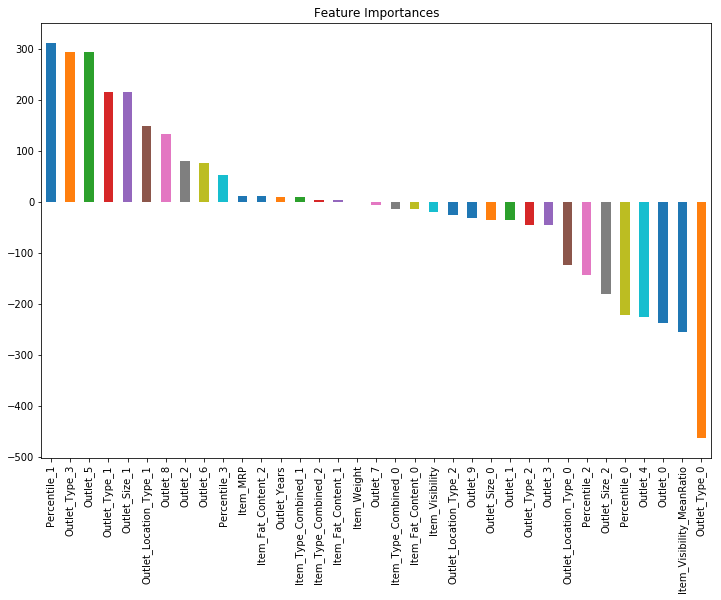

In [86]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg = SVR(kernel="linear")
modelfit(alg, train, test, predictors, target, IDcol, 'svm_model')
coef = pd.Series(alg.coef_[0], predictors).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances', figsize=(12, 8))

save_fig('svm_coefficients')

5. XGboost

In [87]:
# creating XGBoost model
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
rmse

In [ ]:
# predicting on actual test data
X_t = test_datar[feat_cols]
y_result = XGB.predict(X_t)

In [ ]:
y_result

In [ ]:
#creating results .csv file
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
result.to_csv('Bigmart_XGBoost3.csv',index = False)